## <span style="color:brown;"><center> Analysis of Content Reactions Data using Python Libraries </center></span>

In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis (DataFrames)
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization, built on top of matplotlib

#### Load Dataset

In [2]:
# Loading the dataset from an Excel file into a Pandas DataFrame
content=pd.read_excel('Content Reaction.xlsx',sheet_name='Content_Reactions')    #  Reads data from the specified Excel file and sheet

In [3]:
# Displaying the contents of the DataFrame
content    # The DataFrame containing the loaded dataset

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,positive,30
...,...,...,...,...,...,...,...,...,...
24568,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10
24569,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45
24570,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30
24571,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12


#### Data Understanding and Cleaning

In [4]:
# Checking the dimensions of the DataFrame (rows and columns)
content.shape   # Returns the number of rows and columns in the DataFrame

(24573, 9)

In [5]:
# Displaying concise summary of the DataFrame, including data types and non-null counts
content.info()    # Provides an overview of the DataFrame's structure, including column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Column1     24573 non-null  int64         
 1   Content ID  24573 non-null  object        
 2   Type        24573 non-null  object        
 3   Datetime    24573 non-null  datetime64[ns]
 4   User ID     24573 non-null  object        
 5   Type4       24573 non-null  object        
 6   Category    24573 non-null  object        
 7   Sentiment   24573 non-null  object        
 8   Score       24573 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.7+ MB


In [6]:
# Retrieving the list of column names in the DataFrame
content.columns    # Returns the names of all columns in the DataFrame

Index(['Column1', 'Content ID', 'Type', 'Datetime', 'User ID', 'Type4',
       'Category', 'Sentiment', 'Score'],
      dtype='object')

In [7]:
# Checking for missing values in the DataFrame by summing the null entries per column
content.isnull().sum()   # Returns the count of missing (null) values for each column in the DataFrame

Column1       0
Content ID    0
Type          0
Datetime      0
User ID       0
Type4         0
Category      0
Sentiment     0
Score         0
dtype: int64

In [8]:
# Calculating the number of unique values in each column of the DataFrame
content.nunique()     # Returns the count of distinct (unique) values for each column in the DataFrame

Column1       24573
Content ID      962
Type             16
Datetime      24562
User ID         438
Type4             4
Category         29
Sentiment         3
Score            15
dtype: int64

In [9]:
# Displaying the data types of each column in the DataFrame
content.dtypes     # Returns the data type of each column in the DataFrame to understand the variable types

Column1                int64
Content ID            object
Type                  object
Datetime      datetime64[ns]
User ID               object
Type4                 object
Category              object
Sentiment             object
Score                  int64
dtype: object

In [10]:
# Extracting the unique values in the 'content type' column to understand the categories present
content['Type4'].unique()    # Returns an array of distinct values in the 'content type' column

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [11]:
# Extracting the unique values in the 'reaction type' column to identify the different reaction categories
content['Type'].unique()     # Returns an array of distinct values in the 'reaction type' column

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [12]:
# Extracting the unique values in the 'content category' column to identify the different content classifications
content['Category'].unique()     # Returns an array of distinct values in the 'content category' column

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

#### The dataset contains some repeated values with differing case formats (e.g., 'Animals' and 'animals', 'Food' and 'food'). These should be merged for consistency.

In [13]:
# Standardizing values in the DataFrame by replacing specific entries with consistent lowercase formatting
content.replace(to_replace=['Studying','Animals','Fitness','Veganism','Travel','Education','Technology','Soccer','Culture','Food','Healthy Eating','Science','Public Speaking'],value=['studying','animals','fitness','veganism','travel','education','technology','soccer','culture','food','healthy eating','science','public speaking'],inplace=True)   # # Replaces values in the specified columns with corresponding lowercase values for consistency

In [14]:
# Checking the number of unique values in each column after standardizing the values
content.nunique()     # Returns the count of distinct values in each column, helping verify the standardization process

Column1       24573
Content ID      962
Type             16
Datetime      24562
User ID         438
Type4             4
Category         16
Sentiment         3
Score            15
dtype: int64

In [15]:
# Checking the unique values in the 'content category' column after standardizing the values
content['Category'].unique()      # Returns an array of distinct values in the 'content category' column to confirm the replacements

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [16]:
# Checking the unique values in the 'reaction sentiment' column to identify sentiment categories
content['Sentiment'].unique()     # Returns an array of distinct values in the 'reaction sentiment' column for sentiment analysis

array(['negative', 'positive', 'neutral'], dtype=object)

In [17]:
# Identifying and displaying the duplicated rows in the DataFrame
content[content.duplicated()]      # Returns rows that are duplicates of earlier rows in the DataFrame

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score


#### So, The data has been cleaned, with duplicates and null values removed. The analysis can now proceed.

#### Conduct Data Analysis

In [18]:
# Generating a summary of statistics for all columns in the DataFrame, including categorical data
content.describe(include='all')     # Provides summary statistics for numerical and categorical columns in the dataset

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score
count,24573.000000,24573,24573,24573,24573,24573,24573,24573,24573.000000
unique,NaN,962,16,NaN,438,4,16,3,NaN
top,NaN,5bb364a6-8646-4cdb-b1cf-09f4125718d8,heart,NaN,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,animals,positive,NaN
freq,NaN,48,1622,NaN,217,6589,1897,13807,NaN
mean,12774.614821,NaN,NaN,2020-12-17 06:35:24.454278912,NaN,NaN,NaN,NaN,39.622553
min,1.000000,NaN,NaN,2020-06-18 08:07:22,NaN,NaN,NaN,NaN,0.000000
25%,6383.000000,NaN,NaN,2020-09-16 18:51:38,NaN,NaN,NaN,NaN,15.000000
50%,12775.000000,NaN,NaN,2020-12-17 06:08:30,NaN,NaN,NaN,NaN,35.000000
75%,19168.000000,NaN,NaN,2021-03-17 12:05:06,NaN,NaN,NaN,NaN,65.000000
max,25552.000000,NaN,NaN,2021-06-18 08:30:29,NaN,NaN,NaN,NaN,75.000000


In [19]:
# Counting the total number of negative sentiment entries in the DataFrame
content[content.Sentiment=='negative'].value_counts().sum()    # Returns the total count of rows with a 'negative' sentiment in the dataset

7695

In [20]:
# Counting the total number of positive sentiment entries in the DataFrame
content[content.Sentiment=='positive'].value_counts().sum()     # Returns the total count of rows with a 'positive' sentiment in the dataset

13807

In [21]:
# Counting the total number of 'negative' sentiment entries for the 'photo' content type
content[(content.Type4=='photo') & (content.Sentiment=='negative')].value_counts().sum()    # Returns the total count of rows where the content type is 'photo' and sentiment is 'negative' in the dataset

2057

In [22]:
# Counting the total number of 'positive' sentiment entries for the 'photo' content type
content[(content.Type4=='photo') & (content.Sentiment=='positive')].value_counts().sum()   # Returns the total count of rows where the content type is 'photo' and sentiment is 'positive' in the dataset

3700

In [23]:
# Calculating the total sum of score across all rows in the DataFrame
content.Score.sum()    # Returns the sum of all values in the 'score' column of the dataset

973645

In [24]:
# Grouping the data by 'content type' and calculating the total score for each content category
content_group=content.groupby(by='Type4').Score.sum()
# Sorting the grouped scores in descending order to identify the content types with the highest total scores
content_group.sort_values(ascending=False)

Type4
photo    262838
video    246463
GIF      238217
audio    226127
Name: Score, dtype: int64

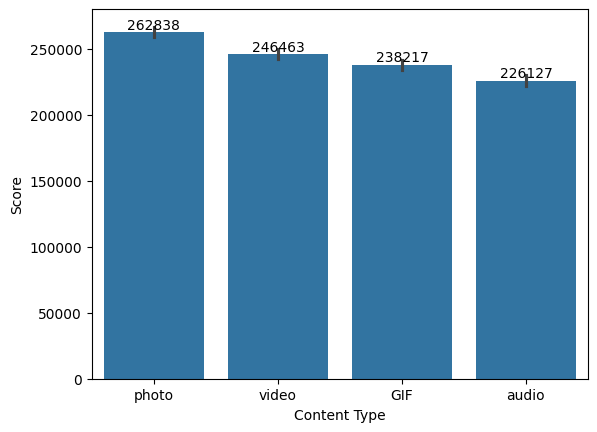

In [25]:
# Creating a bar plot to visualize the total score for each content type using Seaborn
con_bar=sns.barplot(content,x='Type4',y='Score',estimator='sum')
# Adding labels to each bar to display the total score value on the plot
for i in con_bar.containers:
    con_bar.bar_label(i,)

# Setting the x-axis label for clarity
plt.xlabel('Content Type')
# Displaying the plot
plt.show()

#### It was observed that the highest number of reactions occurred for photo content.

In [26]:
# Grouping the data by 'reaction sentiment' and calculating the total score for each sentiment category
sentiment_group=content.groupby(by='Sentiment').Score.sum()
# Sorting the grouped scores in descending order to identify the sentiment categories with the highest total scores
sentiment_group.sort_values(ascending=False)

Sentiment
positive    824056
neutral      84805
negative     64784
Name: Score, dtype: int64

In [27]:
# Grouping the data by 'reaction sentiment' and calculating the total score for each sentiment category
sentiment_group=content.groupby(by='Sentiment').Score.sum()
# Sorting the grouped scores in descending order to identify the sentiment categories with the highest total scores
sentiment_group=sentiment_group.sort_values(ascending=False)
# Calculating the overall total score across all entries in the DataFrame
sentiment_total=content.Score.sum()
# Calculating the percentage contribution of each sentiment category to the total score, rounded to 2 decimal places
((sentiment_group/sentiment_total)*100).round(2)

Sentiment
positive    84.64
neutral      8.71
negative     6.65
Name: Score, dtype: float64

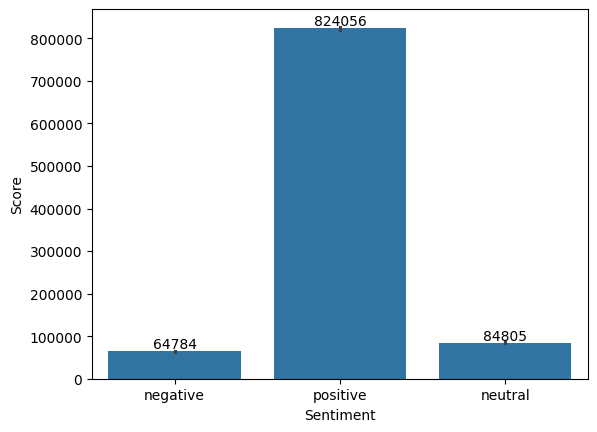

In [28]:
# Creating a bar plot to visualize the total score for each 'reaction sentiment' category using Seaborn
sent_bar=sns.barplot(content,x='Sentiment',y='Score',estimator='sum')
# Adding labels to each bar to display the total score value for each sentiment category on the plot
for i in sent_bar.containers:
    sent_bar.bar_label(i,)

#### The results indicate that the majority of reactions have a positive sentiment.

In [29]:
# Grouping the data by 'content category' and calculating the total score for each category
category_group=content.groupby(by='Category').Score.sum()
# Sorting the total scores in descending order to identify the content categories with the highest scores
category_group.sort_values(ascending=False)

Category
animals            74965
science            71168
healthy eating     69339
technology         68738
food               66676
culture            66579
travel             64880
cooking            64756
soccer             57783
education          57436
fitness            55323
studying           54269
dogs               52511
tennis             50339
veganism           49619
public speaking    49264
Name: Score, dtype: int64

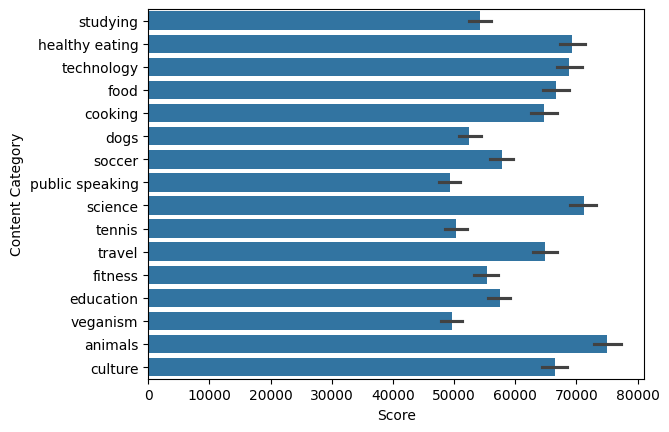

In [30]:
# Creating a bar plot to visualize the total score for each 'content category' using Seaborn
sns.barplot(content,x='Score',y='Category',estimator='sum')
# Setting the label for the y-axis to 'content category' for clarity
plt.ylabel('Content Category')
# Displaying the plot
plt.show()

#### The results show that the top three categories are Animals, Science, and Healthy Eating.

In [31]:
# Displaying the first five rows of the DataFrame to inspect the initial structure of the dataset
content.head()    # Displays the first five rows of the DataFrame for a quick overview of the data

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30


In [32]:
# Extracting the year from the 'datetime' column and creating a new 'year' column in the DataFrame
content['Year']=content['Datetime'].dt.year    # Extracts the year component from the 'datetime' column and assigns it to a new 'year' column

In [33]:
# Extracting the month from the 'datetime' column and creating a new 'month' column in the DataFrame
content['Month']=content['Datetime'].dt.month    # Extracts the month component from the 'datetime' column and assigns it to a new 'month' column

In [34]:
# Extracting the time (hour, minute, second) from the 'datetime' column and creating a new 'time' column in the DataFrame
content['Time']=content['Datetime'].dt.time    # Extracts the time component from the 'datetime' column and assigns it to a new 'time' column

In [35]:
# Displaying the first five rows of the DataFrame to inspect the newly added 'year', 'month', and 'time' columns
content.head()     # Displays the first five rows to verify the successful extraction and addition of 'year', 'month', and 'time' columns

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score,Year,Month,Time
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2020,11,09:43:50
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10,2021,6,12:22:51
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15,2021,4,05:13:58
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,1,19:13:01
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30,2020,8,12:25:58


In [36]:
# Printing the total count of entries for the years 2020 and 2021, based on the 'Year' column
print('2020: ',content[content.Year==2020].value_counts().sum())    # Total count of entries for the year 2020
print('2021: ',content[content.Year==2021].value_counts().sum())    # Total count of entries for the year 2021

2020:  13280
2021:  11293


In [37]:
# Grouping the data by 'Year' and calculating the total sum of scores for each year
content.groupby(by='Year').Score.sum()      # Returns the total sum of 'Score' for each year to analyze year-wise performance

Year
2020    526429
2021    447216
Name: Score, dtype: int64

#### The analysis shows that the total score for 2020 is higher than that for 2021. Let's further investigate by analyzing the sentiment data.

In [38]:
# Creating a pivot table to calculate the total score for each combination of 'Year' and 'Sentiment'
content.pivot_table(index=['Year','Sentiment'],values='Score',aggfunc='sum')    # The pivot table groups the data by 'Year' and 'Sentiment', and calculates the sum of 'Score' for each group

Score
Year Sentiment        
2020 negative    34894
     neutral     45990
     positive   445545
2021 negative    29890
     neutral     38815
     positive   378511

#### The analysis reveals that the total score for all sentiments in 2021 is lower compared to 2020.

In [39]:
# Printing the number of reactions for each month and the list of months
print('No. of Reactions: ',content['Month'].value_counts().values)   # Displays the count of reactions for each month
print('Months: ',content['Month'].value_counts().index)      # Lists the months corresponding to the reaction counts

No. of Reactions:  [2138 2126 2114 2092 2070 2056 2034 2022 2021 2012 1974 1914]
Months:  Index([5, 1, 8, 12, 7, 10, 11, 9, 6, 3, 4, 2], dtype='int32', name='Month')


In [40]:
# Creating a pivot table to calculate the total 'Score' for each combination of Year and Month
content.pivot_table(index=['Year','Month'],values='Score',aggfunc='sum')      # Aggregates 'Score' by summing it for each Year-Month pair

Score
Year Month       
2020 6      35406
     7      82464
     8      82176
     9      80077
     10     82810
     11     82333
     12     81163
2021 1      82938
     2      75509
     3      78915
     4      78598
     5      86293
     6      44963

#### The results indicate that the highest-scoring months are May (2021) and January (2021), while June (2020 and 2021) recorded the lowest scores.

In [41]:
# Creating a pivot table to calculate the total 'Score' for each combination of Year and Content Type
content.pivot_table(index=['Year','Type4'],values='Score',aggfunc='sum')      # Aggregates 'Score' by summing it for each Year-Content Type pair

Score
Year Type4        
2020 GIF    126928
     audio  121161
     photo  142790
     video  135550
2021 GIF    111289
     audio  104966
     photo  120048
     video  110913

In [42]:
# Creating a pivot table to calculate the total 'Score' for each combination of Year, Month, and Content Type
content.pivot_table(index=['Year','Month','Type4'],values='Score',aggfunc='sum')      # Aggregates 'Score' by summing it for each Year-Month-Content Type combination

Score
Year Month Type4       
2020 6     GIF     9083
           audio   7923
           photo   9816
           video   8584
     7     GIF    19810
           audio  19089
           photo  23239
           video  20326
     8     GIF    18602
           audio  19579
           photo  21378
           video  22617
     9     GIF    18989
           audio  17627
           photo  21594
           video  21867
     10    GIF    21428
           audio  18904
           photo  21333
           video  21145
     11    GIF    20284
           audio  19601
           photo  22165
           video  20283
     12    GIF    18732
           audio  18438
           photo  23265
           video  20728
2021 1     GIF    20186
           audio  20310
           photo  22193
           video  20249
     2     GIF    18555
           audio  17614
           photo  20028
           video  19312
     3     GIF    19872
           audio  18621
           photo  20660
           video  19762
     4     GIF    19289
           audio  17978
           photo  22856
           video  18475
     5     GIF    22207
           audio  20202
           photo  22050
           video  21834
     6     GIF    11180
           audio  10241
           photo  12261
           video  11281

#### The analysis shows that the Photo score is the highest in most months, with the exceptions of August and September 2020 (when Video scores were highest) and May 2021 (when Gif scores were the highest).

In [43]:
# Creating a pivot table to calculate the total 'Score' for each combination of Year and Sentiment
content.pivot_table(index=['Year','Sentiment'],values='Score',aggfunc='sum')       # Aggregates 'Score' by summing it for each Year-Sentiment pair

Score
Year Sentiment        
2020 negative    34894
     neutral     45990
     positive   445545
2021 negative    29890
     neutral     38815
     positive   378511

In [44]:
# Creating a pivot table to calculate the total 'Score' for each combination of Year, Sentiment, and Reaction Type
content.pivot_table(index=['Year','Sentiment','Type'],values='Score',aggfunc='sum')      # Aggregates 'Score' by summing it for each Year-Sentiment-Reaction Type combination

Score
Year Sentiment Type              
2020 negative  disgust          0
               dislike       8340
               hate          4195
               scared       12735
               worried       9624
     neutral   indifferent  16660
               peeking      29330
     positive  adore        61560
               cherish      56700
               heart        51540
               interested   24690
               intrigued    35010
               like         41050
               love         55250
               super love   62625
               want         57120
2021 negative  disgust          0
               dislike       7140
               hate          3565
               scared       10845
               worried       8340
     neutral   indifferent  13580
               peeking      25235
     positive  adore        49896
               cherish      48370
               heart        45780
               interested   21780
               intrigued    31365
               like         34950
               love         44460
               super love   51300
               want         50610

#### The results indicate that, in both years, the highest score for 'Scared' is observed under Negative sentiment, 'Peeking' reaches its maximum under Neutral sentiment, and 'Super Love' achieves the highest score under Positive sentiment.

In [45]:
# Setting the display option to show a maximum of 200 rows in the output
pd.set_option('display.max_rows',200)    # Configures pandas to display up to 200 rows when outputting dataframes

In [46]:
# Creating a pivot table to calculate the total 'Score' for each combination of Year, Reaction Sentiment, and Content Category
content.pivot_table(index=['Year','Sentiment','Category'],values='Score',aggfunc='sum')       # Aggregates 'Score' by summing it for each Year-Reaction Sentiment-Content Category combination

Score
Year Sentiment Category              
2020 negative  animals           2845
               cooking           2538
               culture           2340
               dogs              1816
               education         1945
               fitness           2001
               food              2326
               healthy eating    2357
               public speaking   1647
               science           2504
               soccer            1931
               studying          2047
               technology        2187
               tennis            1958
               travel            2519
               veganism          1933
     neutral   animals           3405
               cooking           2630
               culture           2945
               dogs              2835
               education         2840
               fitness           2660
               food              3155
               healthy eating    3610
               public speaking   1915
               science           3485
               soccer            2695
               studying          2930
               technology        2840
               tennis            2380
               travel            3005
               veganism          2660
     positive  animals          33696
               cooking          29994
               culture          29896
               dogs             24149
               education        24675
               fitness          25616
               food             30150
               healthy eating   32413
               public speaking  23617
               science          33226
               soccer           27224
               studying         24070
               technology       30795
               tennis           23615
               travel           29529
               veganism         22880
2021 negative  animals           2377
               cooking           2156
               culture           2229
               dogs              1538
               education         1725
               fitness           1740
               food              2099
               healthy eating    1898
               public speaking   1515
               science           2058
               soccer            1783
               studying          1664
               technology        1903
               tennis            1785
               travel            1951
               veganism          1469
     neutral   animals           3110
               cooking           2525
               culture           2740
               dogs              2245
               education         2405
               fitness           1990
               food              2810
               healthy eating    2190
               public speaking   1900
               science           2875
               soccer            2565
               studying          1865
               technology        3180
               tennis            2000
               travel            2400
               veganism          2015
     positive  animals          29532
               cooking          24913
               culture          26429
               dogs             19928
               education        23846
               fitness          21316
               food             26136
               healthy eating   26871
               public speaking  18670
               science          27020
               soccer           21585
               studying         21693
               technology       27833
               tennis           18601
               travel           25476
               veganism         18662

#### The results show that in 2020, 'Animals' received the highest score in both Negative and Positive sentiments, while 'Healthy Eating' had the highest score in Neutral sentiment. In 2021, 'Animals' again topped the scores in Negative and Positive sentiments, while 'Technology' achieved the highest score in Neutral sentiment.

In [47]:
# Creating a pivot table to calculate the total 'Score' for each Time period, then sorting the result in descending order by 'Score'
a=content.pivot_table(index=['Time'],values=['Score'],aggfunc='sum')        # Aggregates 'Score' by summing it for each Time period
a.sort_values(by='Score',ascending=False)        # Sorts the pivot table in descending order based on 'Score'

,Score
Time,
06:42:55,235
22:16:36,207
20:13:01,207
05:20:29,207
22:17:35,204
...,...
19:07:37,0
08:38:34,0
14:36:36,0


#### It is observed that the highest total score is recorded between 5:00 to 7:00 AM in the morning and 8:00 to 11:00 PM in the evening.

## Final Conclusion : 
(Data period: June 2020 to June 2021)

1. Photo Content received the highest number of reactions.
2. The Positive sentiment garnered the maximum reaction score, accounting for 84.64% of total reactions.
3. The highest number of reactions occurred in May, followed by January, based on the total score count.
4. 2021 saw a decrease in reaction scores compared to 2020.
5. Animal-related content received the highest reaction scores, indicating a strong preference for such content, followed by Science and Healthy Eating. Technology ranked fourth.
6. The peak reaction scores were recorded between 5:00 to 7:00 AM in the morning and 8:00 to 11:00 PM in the evening, suggesting that people are more likely to engage with content and provide reactions during these time periods.